In [3]:
!pip install fastcluster

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import single, ward, complete, average, cophenet
from scipy.spatial.distance import pdist, squareform
import fastcluster as fc


In [ ]:
## Importing the USArrests dataset

In [6]:
data=pd.read_csv('Downloads/USArrests.csv')

In [7]:
data=pd.DataFrame(data)

In [8]:
data.head()

,State,Murder,Assault,UrbanPop,Rape,sil_score
0,Alabama,13.2,236,58,21.2,0.485775
1,Alaska,10.0,263,48,44.5,0.058252
2,Arizona,8.1,294,80,31.0,0.415483
3,Arkansas,8.8,190,50,19.5,0.118709
4,California,9.0,276,91,40.6,0.435559


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State      50 non-null     object 
 1   Murder     50 non-null     float64
 2   Assault    50 non-null     int64  
 3   UrbanPop   50 non-null     int64  
 4   Rape       50 non-null     float64
 5   sil_score  50 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.5+ KB


In [9]:
## Making the column "State" as the index

In [10]:
data=data.set_index('State')

In [11]:
data.head()

,Murder,Assault,UrbanPop,Rape,sil_score
State,,,,,
Alabama,13.2,236,58,21.2,0.485775
Alaska,10.0,263,48,44.5,0.058252
Arizona,8.1,294,80,31.0,0.415483
Arkansas,8.8,190,50,19.5,0.118709
California,9.0,276,91,40.6,0.435559


In [12]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

In [ ]:
###______Dendrogram

In [13]:
import scipy.cluster.hierarchy as shc

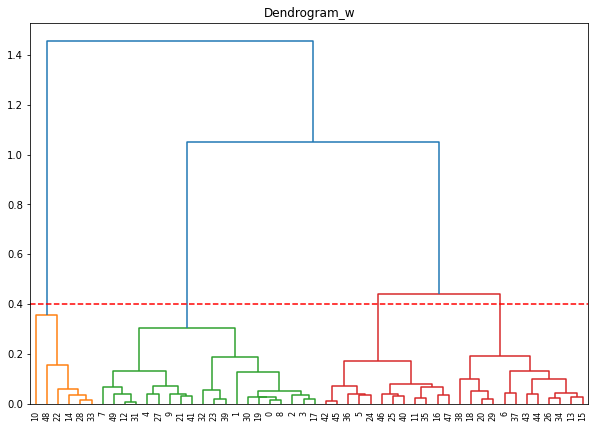

In [14]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram_w")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=0.4, color='r', linestyle='--') #4 clstrs


In [15]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)


array([2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 0, 3, 2, 1, 0, 1, 3, 2, 1, 2, 1, 2,
       0, 2, 3, 3, 1, 2, 0, 1, 2, 2, 2, 0, 1, 3, 3, 1, 1, 2, 3, 2, 3, 1,
       1, 3, 3, 3, 0, 2], dtype=int64)

In [16]:
data_scaled['cluster'] = cluster.labels_

In [ ]:
#RAW_PLOT_WARD

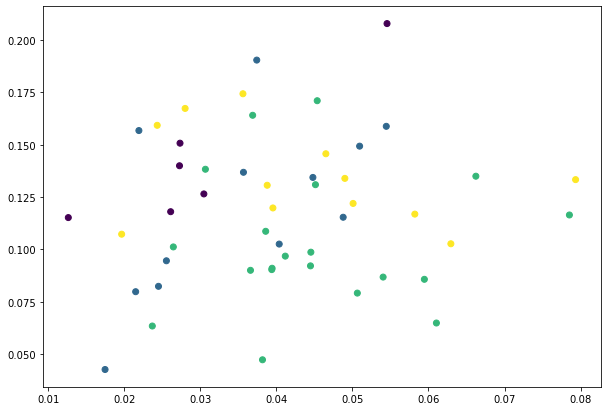

In [17]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Murder'], data_scaled['Rape'], c=cluster.labels_)


In [ ]:
#_____below, run in one block

No handles with labels found to put in legend.


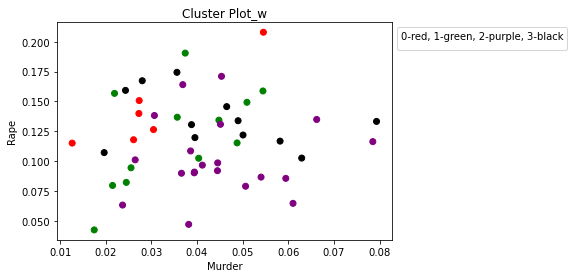

In [18]:
colors = {0:'red', 1:'green', 2:'purple', 3:'black'}
plt.scatter(data_scaled['Murder'], data_scaled['Rape'], 
            c= data_scaled['cluster'].map(colors))
plt.title('Cluster Plot_w')
plt.xlabel('Murder')
plt.ylabel('Rape')
plt.legend(title='0-red, 1-green, 2-purple, 3-black', bbox_to_anchor=(1,1))


In [ ]:
#________above, run in one block


In [19]:
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Murder     50 non-null     float64
 1   Assault    50 non-null     float64
 2   UrbanPop   50 non-null     float64
 3   Rape       50 non-null     float64
 4   sil_score  50 non-null     float64
 5   cluster    50 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 2.5 KB


In [ ]:
#____________________seaborn

Text(-5.950000000000003, 0.5, 'Rape')

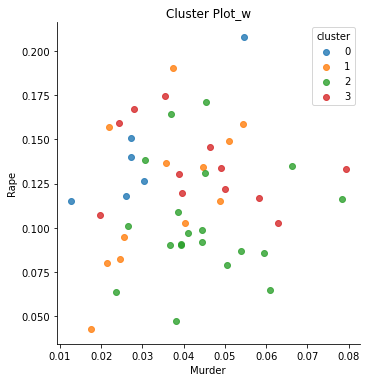

In [20]:
sns.lmplot(data=data_scaled, x='Murder', y='Rape', hue='cluster', 
                   fit_reg=False, legend=True, legend_out=False)
plt.title('Cluster Plot_w')
plt.xlabel('Murder')
plt.ylabel('Rape')

In [ ]:
#_____________cophenetic corr_ward

In [21]:
from scipy.cluster.hierarchy import single, ward, complete, average, cophenet
from scipy.spatial.distance import pdist, squareform
import fastcluster as fc
import numpy as np

In [22]:
w = ward(pdist(data_scaled))
w 

array([[1.20000000e+01, 3.10000000e+01, 7.69154488e-03, 2.00000000e+00],
       [4.20000000e+01, 4.50000000e+01, 1.08332299e-02, 2.00000000e+00],
       [0.00000000e+00, 8.00000000e+00, 1.28147934e-02, 2.00000000e+00],
       [2.80000000e+01, 3.30000000e+01, 1.40927805e-02, 2.00000000e+00],
       [2.30000000e+01, 3.90000000e+01, 1.78068377e-02, 2.00000000e+00],
       [2.00000000e+01, 2.90000000e+01, 1.87451736e-02, 2.00000000e+00],
       [3.00000000e+00, 1.70000000e+01, 1.98621308e-02, 2.00000000e+00],
       [2.60000000e+01, 3.40000000e+01, 2.35626079e-02, 2.00000000e+00],
       [1.10000000e+01, 3.50000000e+01, 2.36072158e-02, 2.00000000e+00],
       [1.90000000e+01, 5.20000000e+01, 2.53503117e-02, 3.00000000e+00],
       [1.30000000e+01, 1.50000000e+01, 2.65983911e-02, 2.00000000e+00],
       [3.00000000e+01, 5.90000000e+01, 2.70530555e-02, 4.00000000e+00],
       [2.10000000e+01, 4.10000000e+01, 3.03933337e-02, 2.00000000e+00],
       [2.50000000e+01, 4.00000000e+01, 3.13078957e

In [23]:
w_df =pd.DataFrame(w)
cophe_dists_w = cophenet(w)
cophe_dists_w
cophe_dists_w_df = pd.DataFrame(cophe_dists_w)
orign_dists_w = fc.pdist(data_scaled) 

In [ ]:
# Calculating cophenetic correlation

In [24]:
corr_coef_w = np.corrcoef(orign_dists_w, cophe_dists_w)[0,1] 
corr_coef_w #0.82

0.8234340596109901

In [ ]:
#_____________________________below in one run

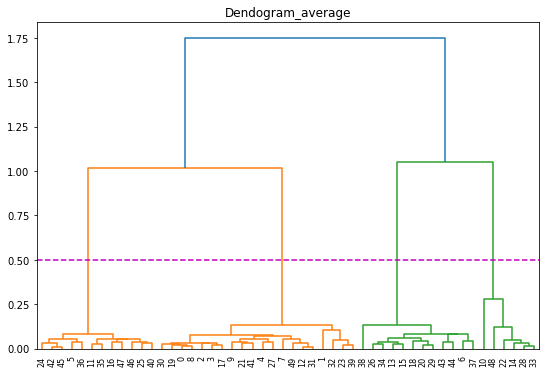

In [25]:
plt.figure(figsize=(9,6))
plt.title('Dendogram_average')
dend=shc.dendrogram(shc.linkage(data_scaled,method='average'))
plt.axhline(y=0.5,color='m',linestyle='--')

In [ ]:
#____cophenetic correlation_______________AVERAGE

In [26]:
from scipy.cluster.hierarchy import single, ward, complete, average, cophenet
from scipy.spatial.distance import pdist, squareform
import fastcluster as fc
import numpy as np

In [28]:
a = average(pdist(data_scaled)) # dists at which clubbing happened
a

array([[1.20000000e+01, 3.10000000e+01, 7.69154488e-03, 2.00000000e+00],
       [4.20000000e+01, 4.50000000e+01, 1.08332299e-02, 2.00000000e+00],
       [0.00000000e+00, 8.00000000e+00, 1.28147934e-02, 2.00000000e+00],
       [2.80000000e+01, 3.30000000e+01, 1.40927805e-02, 2.00000000e+00],
       [2.30000000e+01, 3.90000000e+01, 1.78068377e-02, 2.00000000e+00],
       [2.00000000e+01, 2.90000000e+01, 1.87451736e-02, 2.00000000e+00],
       [3.00000000e+00, 1.70000000e+01, 1.98621308e-02, 2.00000000e+00],
       [1.90000000e+01, 5.20000000e+01, 2.22103759e-02, 3.00000000e+00],
       [2.60000000e+01, 3.40000000e+01, 2.35626079e-02, 2.00000000e+00],
       [1.10000000e+01, 3.50000000e+01, 2.36072158e-02, 2.00000000e+00],
       [3.00000000e+01, 5.70000000e+01, 2.45933726e-02, 4.00000000e+00],
       [1.30000000e+01, 1.50000000e+01, 2.65983911e-02, 2.00000000e+00],
       [2.00000000e+00, 5.60000000e+01, 2.85635332e-02, 3.00000000e+00],
       [2.40000000e+01, 5.10000000e+01, 2.87469044e

In [29]:
a_df = pd.DataFrame(a)

In [30]:
cophe_dists_a = cophenet(a) 
cophe_dists_a

array([0.13133937, 0.03238451, 0.03238451, ..., 1.74914393, 1.01653241,
       1.74914393])

In [31]:
cophe_dists_a_df = pd.DataFrame(cophe_dists_a)
orign_dists_a = fc.pdist(data_scaled) 

In [ ]:
# Calculating cophenetic correlation

In [32]:
corr_coef_a = np.corrcoef(orign_dists_a, cophe_dists_a)[0,1] 
corr_coef_a #0.83

0.8333986446703016

In [ ]:
#++++++++++++++++++++++++++++++++++++++++++++++++single

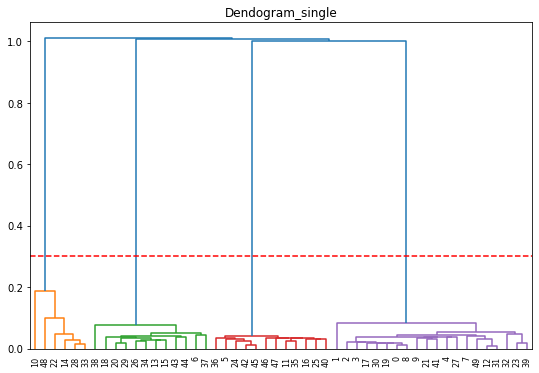

In [33]:
plt.figure(figsize=(9,6))
plt.title('Dendogram_single')
dend=shc.dendrogram(shc.linkage(data_scaled,method='single'))
plt.axhline(y=0.3,color='red',linestyle='--')

In [37]:
s = single(pdist(data_scaled))
s 

array([[1.20000000e+01, 3.10000000e+01, 7.69154488e-03, 2.00000000e+00],
       [4.20000000e+01, 4.50000000e+01, 1.08332299e-02, 2.00000000e+00],
       [0.00000000e+00, 8.00000000e+00, 1.28147934e-02, 2.00000000e+00],
       [2.80000000e+01, 3.30000000e+01, 1.40927805e-02, 2.00000000e+00],
       [1.90000000e+01, 5.20000000e+01, 1.67576098e-02, 3.00000000e+00],
       [2.30000000e+01, 3.90000000e+01, 1.78068377e-02, 2.00000000e+00],
       [3.00000000e+01, 5.40000000e+01, 1.87233352e-02, 4.00000000e+00],
       [2.00000000e+01, 2.90000000e+01, 1.87451736e-02, 2.00000000e+00],
       [1.70000000e+01, 5.60000000e+01, 1.88641572e-02, 5.00000000e+00],
       [3.00000000e+00, 5.80000000e+01, 1.98621308e-02, 6.00000000e+00],
       [2.00000000e+00, 5.90000000e+01, 2.00808533e-02, 7.00000000e+00],
       [2.60000000e+01, 3.40000000e+01, 2.35626079e-02, 2.00000000e+00],
       [1.10000000e+01, 3.50000000e+01, 2.36072158e-02, 2.00000000e+00],
       [2.40000000e+01, 5.10000000e+01, 2.59152368e

In [38]:
s_df =pd.DataFrame(s)
cophe_dists_s = cophenet(s) 
cophe_dists_s

array([0.0818274 , 0.02008085, 0.01986213, ..., 1.01078139, 1.00077517,
       1.01078139])

In [40]:
cophe_dists_s_df = pd.DataFrame(cophe_dists_s)
orign_dists_s = fc.pdist(data_scaled) 

In [ ]:
# Calculating cophenetic correlation

In [41]:
corr_coef_s = np.corrcoef(orign_dists_s, cophe_dists_s)[0,1] 
corr_coef_s #0.7577

0.7576864409279042

In [ ]:
#++++++++++++++++++++++++++++++++++++++++++++++++complete

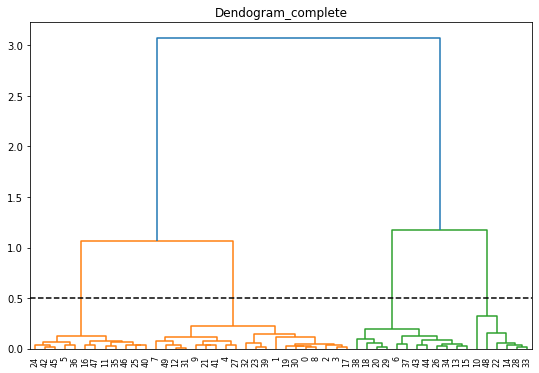

In [42]:
plt.figure(figsize=(9,6))
plt.title('Dendogram_complete')
dend=shc.dendrogram(shc.linkage(data_scaled,method='complete'))
plt.axhline(y=0.5,color='k',linestyle='--')

In [44]:
c = complete(pdist(data_scaled))
c 


array([[1.20000000e+01, 3.10000000e+01, 7.69154488e-03, 2.00000000e+00],
       [4.20000000e+01, 4.50000000e+01, 1.08332299e-02, 2.00000000e+00],
       [0.00000000e+00, 8.00000000e+00, 1.28147934e-02, 2.00000000e+00],
       [2.80000000e+01, 3.30000000e+01, 1.40927805e-02, 2.00000000e+00],
       [2.30000000e+01, 3.90000000e+01, 1.78068377e-02, 2.00000000e+00],
       [2.00000000e+01, 2.90000000e+01, 1.87451736e-02, 2.00000000e+00],
       [3.00000000e+00, 1.70000000e+01, 1.98621308e-02, 2.00000000e+00],
       [2.60000000e+01, 3.40000000e+01, 2.35626079e-02, 2.00000000e+00],
       [1.10000000e+01, 3.50000000e+01, 2.36072158e-02, 2.00000000e+00],
       [1.30000000e+01, 1.50000000e+01, 2.65983911e-02, 2.00000000e+00],
       [3.00000000e+01, 5.20000000e+01, 2.68297137e-02, 3.00000000e+00],
       [1.90000000e+01, 6.00000000e+01, 2.82270689e-02, 4.00000000e+00],
       [2.10000000e+01, 4.10000000e+01, 3.03933337e-02, 2.00000000e+00],
       [2.50000000e+01, 4.00000000e+01, 3.13078957e

In [47]:
c_df =pd.DataFrame(c)
cophe_dists_c = cophenet(c) 
orign_dists_c = fc.pdist(data_scaled) 

In [48]:
# Calculating cophenetic correlation
corr_coef_c = np.corrcoef(orign_dists_c, cophe_dists_c)[0,1] 
corr_coef_c #0.81

0.8086533374724852